In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

from src.data_exploration.data_exploration import *

In [3]:
df = read_sqlite_table('housedata', './data/processed/rome_house_preprocessing.db')

In [4]:
df = df.drop('macrozoneId', axis=1)

In [5]:
df.columns

Index(['latitude', 'longitude', 'price', 'buildingYear', 'surface', 'rooms',
       'bathrooms', 'floor', 'garage', 'isNew', 'luxury', 'typology',
       'category', 'condition', 'features'],
      dtype='object')

In [6]:
df1 = df.copy()
df1 = df1[df1['latitude']!='None']
df1['latitude'] = df1['latitude'].astype('float32')
df1['longitude'] = df1['longitude'].astype('float32')

In [7]:
df1.shape

(15702, 15)

In [8]:
df2 = df1.copy()
df2['price'] = df2['price'].str.replace('€','').str.replace('.','').str.replace(' ','')
df2['price'] = df2['price'].astype(float)

C:\Users\raffa\AppData\Local\Temp\ipykernel_15848\1001120157.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['price'] = df2['price'].str.replace('€','').str.replace('.','').str.replace(' ','')


In [9]:
df3 = df2.copy()
df3['buildingYear'] = df3['buildingYear'].replace('None', np.nan).astype(float)

In [10]:
df4 = df3.copy()
df4[['surface','m2']] = df4['surface'].str.split(pat=" ", n= 1, expand=True)
df4 = df4.drop(['m2'], axis=1)
df4['surface'] = df4['surface'].str.replace('.','')
df4['surface'] = df4['surface'].astype(int)

C:\Users\raffa\AppData\Local\Temp\ipykernel_15848\587257418.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df4['surface'] = df4['surface'].str.replace('.','')


In [17]:
df4['rooms'].value_counts()

3     5550
2     3817
4     2937
5+    1487
5     1290
1      621
Name: rooms, dtype: int64

In [12]:
df4['bathrooms'].value_counts()

1       8412
2       5455
3       1138
3+       694
None       3
Name: bathrooms, dtype: int64

In [20]:
df4 = df4[df4['bathrooms'] != 'None']

In [22]:
df['floor'].value_counts()

1        3135
2        2518
3        2087
T        1910
4        1527
None     1380
5         987
R         495
6         481
7         402
S         309
8         204
S - T      62
1 - 2      40
3 - 4      37
9          31
4 - 5      31
5 - 6      26
2 - 3      21
10         20
Name: floor, dtype: int64

In [25]:
df4['garage'].value_counts()

0     10517
1      4115
2       903
3        67
4        32
5        16
10       15
8         8
6         6
7         5
15        4
20        4
9         3
27        1
70        1
14        1
11        1
Name: garage, dtype: int64

In [26]:
df5 = df4.copy()
df5.loc[df1.groupby('garage')['garage'].transform('count').lt(20), 'garage'] = 'None'

In [27]:
df5['garage'].value_counts()

0       10517
1        4115
2         903
3          67
None       65
4          32
Name: garage, dtype: int64

In [29]:
df5['isNew'].value_counts()

False    14781
True       918
Name: isNew, dtype: int64

In [30]:
df5['isNew'] = df5['isNew'].replace('False', '0').replace('True', '1')
df5['isNew'] = df5['isNew'].astype(int)

In [31]:
df5['isNew'].value_counts()

0    14781
1      918
Name: isNew, dtype: int64

In [41]:
df5['luxury'].value_counts()

0    13740
1     1808
Name: luxury, dtype: int64

In [33]:
df5['luxury'] = df5['luxury'].replace('False', '0').replace('True', '1')
df5['luxury'] = df5['luxury'].astype(int)

In [34]:
df5['luxury'].value_counts()

0    13891
1     1808
Name: luxury, dtype: int64

In [38]:
df5['category'].value_counts()

Residenziale    15548
Name: category, dtype: int64

In [37]:
df5 = df5[df5['category'] != 'Palazzi - Edifici']

In [40]:
df5 = df5.drop('category', axis=1)

In [42]:
df5['typology'].value_counts()

Appartamento          14017
Attico - Mansarda       950
Villa                   350
Villetta a schiera      107
Casa indipendente        56
Loft                     55
Rustico - Casale         13
Name: typology, dtype: int64

In [43]:
df5['condition'].value_counts()

Buono / Abitabile         6462
Ottimo / Ristrutturato    4600
Da ristrutturare          2890
Nuovo / In costruzione    1468
None                       128
Name: condition, dtype: int64

In [44]:
df5.columns

Index(['latitude', 'longitude', 'price', 'buildingYear', 'surface', 'rooms',
       'bathrooms', 'floor', 'garage', 'isNew', 'luxury', 'typology',
       'condition', 'features'],
      dtype='object')

# one hot encoding solo di alcune features

In [52]:
df6 = df5.copy()

In [53]:
features = ['balcone', 'terrazza', 'cantina', 'piscina', 'giardino']

for feature in features:
    df6[feature] = 0
    
df6['features'] = df6['features'].str.lower()

for feature in features:
    if feature == 'balcone':
        df6.loc[(df6['features'].str.contains(feature)) | df6['features'].str.contains('balconi'), feature] = 1
    else:
         df6.loc[(df6['features'].str.contains(feature)), feature] = 1

In [54]:
df6 = df6.drop('features', axis=1)

In [60]:
df6

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,garage,isNew,luxury,typology,condition,balcone,terrazza,cantina,piscina,giardino
0,41.854401,12.50600,219000.0,NaN,65,2,1,T,0,0,0,Appartamento,Ottimo / Ristrutturato,0,0,1,0,0
1,41.854401,12.50600,219000.0,NaN,65,2,1,T,0,0,0,Appartamento,Ottimo / Ristrutturato,0,0,0,0,1
2,41.845798,12.54560,96000.0,1955.0,114,3,1,S,0,0,0,Appartamento,Buono / Abitabile,0,1,1,0,0
3,41.845501,12.48950,500000.0,1971.0,122,4,2,4,1,0,0,Appartamento,Ottimo / Ristrutturato,1,1,1,0,1
4,41.839802,12.53980,89000.0,1950.0,50,1,1,3,0,0,0,Attico - Mansarda,Buono / Abitabile,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15697,41.880199,12.48320,550000.0,NaN,60,2,1,2,0,0,1,Appartamento,Nuovo / In costruzione,0,1,0,0,1
15698,41.875801,12.48760,240000.0,1970.0,47,2,1,S,0,0,0,Appartamento,Buono / Abitabile,0,0,0,0,1
15699,41.877300,12.48130,690000.0,NaN,110,3,1,1,0,0,1,Appartamento,Ottimo / Ristrutturato,0,0,0,0,0
15700,41.882000,12.48630,7200000.0,1900.0,1000,5+,3+,None,None,0,1,Villa,Ottimo / Ristrutturato,1,1,1,0,1


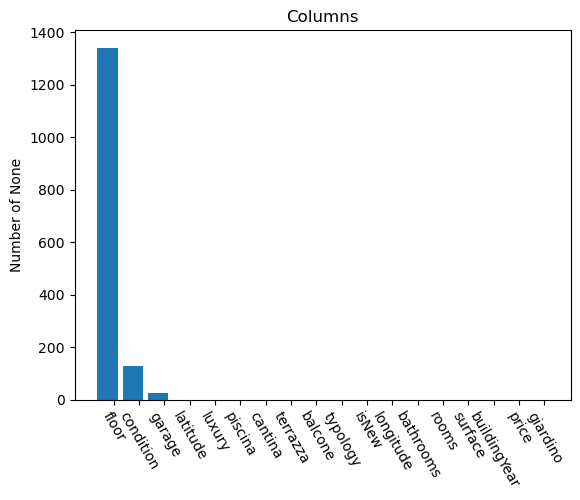

In [62]:
plot_bar(df6, 'None')

In [63]:
save_to_sql('./data/processed/rome_house_cleaned.db', df6, 'housedata')

In [64]:
df6

,latitude,longitude,price,buildingYear,surface,rooms,bathrooms,floor,garage,isNew,luxury,typology,condition,balcone,terrazza,cantina,piscina,giardino
0,41.854401,12.50600,219000.0,NaN,65,2,1,T,0,0,0,Appartamento,Ottimo / Ristrutturato,0,0,1,0,0
1,41.854401,12.50600,219000.0,NaN,65,2,1,T,0,0,0,Appartamento,Ottimo / Ristrutturato,0,0,0,0,1
2,41.845798,12.54560,96000.0,1955.0,114,3,1,S,0,0,0,Appartamento,Buono / Abitabile,0,1,1,0,0
3,41.845501,12.48950,500000.0,1971.0,122,4,2,4,1,0,0,Appartamento,Ottimo / Ristrutturato,1,1,1,0,1
4,41.839802,12.53980,89000.0,1950.0,50,1,1,3,0,0,0,Attico - Mansarda,Buono / Abitabile,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15697,41.880199,12.48320,550000.0,NaN,60,2,1,2,0,0,1,Appartamento,Nuovo / In costruzione,0,1,0,0,1
15698,41.875801,12.48760,240000.0,1970.0,47,2,1,S,0,0,0,Appartamento,Buono / Abitabile,0,0,0,0,1
15699,41.877300,12.48130,690000.0,NaN,110,3,1,1,0,0,1,Appartamento,Ottimo / Ristrutturato,0,0,0,0,0
15700,41.882000,12.48630,7200000.0,1900.0,1000,5+,3+,None,None,0,1,Villa,Ottimo / Ristrutturato,1,1,1,0,1
